In [3]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')  # Or 'Qt5Agg' if you're using Qt
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap

# Función para inicializar el grid con celdas infectadas aleatoriamente
def initialize_grid(M, N, I0):
    grid = np.zeros((M, N), dtype=int)  # Todas las celdas son susceptibles inicialmente (0)
    
    # Elegir I0 celdas aleatorias para ser infectadas
    infected_cells = random.sample([(i, j) for i in range(M) for j in range(N)], I0)
    for cell in infected_cells:
        grid[cell] = 1  # Infectadas (estado 1)
    
    return grid

# Función para ejecutar la simulación SIR
def simulate_sir(M, N, T, I0, rad, beta, gamma):
    grid = initialize_grid(M, N, I0)
    grid_history = []  # Historial del grid
    population_counts = []  # Historial de S, I, R
    
    for t in range(T):
        new_grid = grid.copy()  # Copiamos el grid actual
        for i in range(M):
            for j in range(N):
                if grid[i, j] == 0:  # Susceptible
                    neighborhood = grid[max(0, i - rad):min(M, i + rad + 1), max(0, j - rad):min(N, j + rad + 1)]
                    infected_neighbors = np.sum(neighborhood == 1)
                    
                    # Probabilidad de infección basada en la cantidad de vecinos infectados
                    if infected_neighbors > 0 and random.random() < beta * infected_neighbors:
                        new_grid[i, j] = 1  # Celda se infecta
                
                elif grid[i, j] == 1:  # Infectado
                    # Probabilidad de recuperación
                    if random.random() < gamma:
                        new_grid[i, j] = 2  # Celda se recupera
        
        # Actualizamos el grid y registramos el conteo de las poblaciones S, I, R
        grid = new_grid
        S_count = np.sum(grid == 0)
        I_count = np.sum(grid == 1)
        R_count = np.sum(grid == 2)
        
        grid_history.append(grid.copy())
        population_counts.append((S_count, I_count, R_count))
    
    return grid_history, population_counts

# Función para crear la animación del grid
def animate_grid(grid_history):
    # Ajuste de colores según las imágenes proporcionadas
    colors = ['#8B0000', '#00008B', '#7CFC00']  # Rojo oscuro, Azul oscuro, Verde claro
    cmap = ListedColormap(colors)
  
    fig, ax = plt.subplots()
    img = ax.imshow(grid_history[0], cmap=cmap, vmin=0, vmax=2)

    def update(frame):
        img.set_data(grid_history[frame])
        ax.set_title(f'Tiempo: {frame}')
        return [img]

    # Store the animation in a variable to avoid it being garbage collected
    ani = animation.FuncAnimation(fig, update, frames=len(grid_history), interval=200, blit=False)
    
    # Keep a reference to the animation to prevent garbage collection
    return ani

# Parámetros del modelo SIR
M = 50  # Tamaño del grid (filas)
N = 50  # Tamaño del grid (columnas)
T = 100  # Tiempo de simulación
I0 = 5   # Número inicial de infectados
rad = 1  # Radio de interacción
beta = 0.1  # Probabilidad de infección
gamma = 0.25  # Probabilidad de recuperación

# Ejecutar la simulación SIR
grid_history, population_counts = simulate_sir(M, N, T, I0, rad, beta, gamma)

# Mostrar la animación del grid con los colores ajustados
ani = animate_grid(grid_history)

plt.show()  # Ensure that plt.show() is used after returning the animation


ImportError: cannot import name 'ImageTk' from 'PIL' (/usr/lib/python3/dist-packages/PIL/__init__.py)

## SEGUNDO

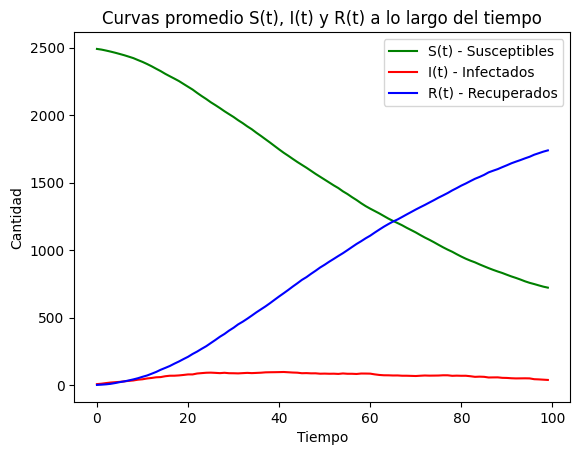

In [4]:
%matplotlib inline

import numpy as np
import random
import matplotlib.pyplot as plt


def initialize_grid(M, N, I0):
    grid = np.zeros((M, N), dtype=int) 
    
   
    infected_cells = random.sample([(i, j) for i in range(M) for j in range(N)], I0)
    for cell in infected_cells:
        grid[cell] = 1  # Infectadas (estado 1)
    
    return grid

# Función para ejecutar la simulación SIR
def simulate_sir(M, N, T, I0, rad, beta, gamma):
    grid = initialize_grid(M, N, I0)
    population_counts = []  
    
    for t in range(T):
        new_grid = grid.copy() 
        for i in range(M):
            for j in range(N):
                if grid[i, j] == 0:  # Susceptible
                    neighborhood = grid[max(0, i - rad):min(M, i + rad + 1), max(0, j - rad):min(N, j + rad + 1)]
                    infected_neighbors = np.sum(neighborhood == 1)
                    
          
                    if infected_neighbors > 0 and random.random() < beta * infected_neighbors:
                        new_grid[i, j] = 1  # Celda se infecta
                
                elif grid[i, j] == 1:  # Infectado
                    if random.random() < gamma:
                        new_grid[i, j] = 2  
        
        # Actualizamos el grid y registramos el conteo de las poblaciones S, I, R
        grid = new_grid
        S_count = np.sum(grid == 0)
        I_count = np.sum(grid == 1)
        R_count = np.sum(grid == 2)
        
        population_counts.append((S_count, I_count, R_count))
    
    return population_counts

# Función para repetir la simulación Nexp veces y calcular promedios
def repeat_simulation(Nexp, M, N, T, I0, rad, beta, gamma):
    S_avg = np.zeros(T)
    I_avg = np.zeros(T)
    R_avg = np.zeros(T)
    
    for _ in range(Nexp):
        population_counts = simulate_sir(M, N, T, I0, rad, beta, gamma)
        for t in range(T):
            S_avg[t] += population_counts[t][0] / Nexp
            I_avg[t] += population_counts[t][1] / Nexp
            R_avg[t] += population_counts[t][2] / Nexp
    
    return S_avg, I_avg, R_avg

# Función para graficar los resultados
def plot_results(S_avg, I_avg, R_avg, T):
    time_steps = np.arange(T)
    
    plt.plot(time_steps, S_avg, label="S(t) - Susceptibles", color='green')
    plt.plot(time_steps, I_avg, label="I(t) - Infectados", color='red')
    plt.plot(time_steps, R_avg, label="R(t) - Recuperados", color='blue')
    
    plt.xlabel("Tiempo")
    plt.ylabel("Cantidad")
    plt.title("Curvas promedio S(t), I(t) y R(t) a lo largo del tiempo")
    plt.legend()
    plt.show()

# Parámetros del modelo SIR
M = 50  # Tamaño del grid (filas)
N = 50  # Tamaño del grid (columnas)
T = 100  # Tiempo de simulación
I0 = 5   # Número inicial de infectados
rad = 1  # Radio de interacción
beta = 0.1  # Probabilidad de infección
gamma = 0.25  # Probabilidad de recuperación
Nexp = 10  # Número de experimentos

# Ejecutar la simulación varias veces y obtener promedios
S_avg, I_avg, R_avg = repeat_simulation(Nexp, M, N, T, I0, rad, beta, gamma)


# Graficar los resultados
plot_results(S_avg, I_avg, R_avg, T)

### Como cambian las curvas de contagio en funcion de estos parametros? 

Al cambiar los valores de β y γ, las curvas de contagio muestran comportamientos distintos. Con un β alto, la curva de infectados I(t) crece rápidamente, mientras que una γ baja prolonga el tiempo en que los individuos permanecen infectados, retrasando la recuperación. Por el contrario, con un β bajo y una γ alta, el pico de infectados es más bajo y ocurre más tarde, con una recuperación más rápida, lo que aplanaría la curva de infección. Esto refleja cómo las tasas de infección y recuperación influyen en la dinámica de una epidemia.

## Tercera Parte

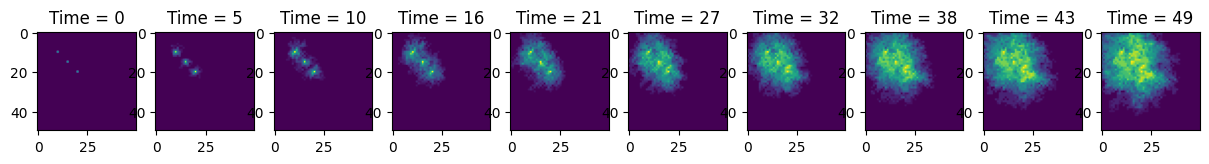

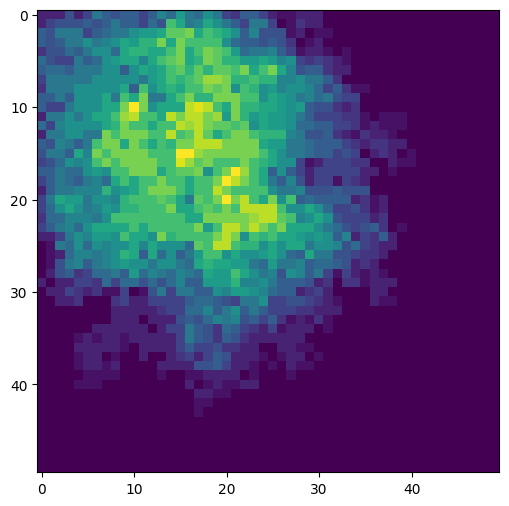

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def initialize_grid(M, N, infected_positions):
    grid = np.zeros((M, N), dtype=int)
    for (i, j) in infected_positions:
        grid[i, j] = 1
    return grid

def simulate_sir(grid, M, N, T, rad, beta, gamma):
    history = []
    S_count, I_count, R_count = [], [], []

    for t in range(T + 1):
        new_grid = grid.copy()
        history.append(new_grid.copy())

        S, I, R = np.sum(grid == 0), np.sum(grid == 1), np.sum(grid == 2)
        S_count.append(S)
        I_count.append(I)
        R_count.append(R)

        for i in range(M):
            for j in range(N):
                if grid[i, j] == 0:  # susceptible
                    infected_neighbors = 0
                    for x in range(max(0, i - rad), min(M, i + rad + 1)):
                        for y in range(max(0, j - rad), min(N, j + rad + 1)):
                            if grid[x, y] == 1:
                                infected_neighbors += 1
                    if np.random.rand() < 1 - (1 - beta) ** infected_neighbors:
                        new_grid[i, j] = 1
                elif grid[i, j] == 1:  # infected
                    if np.random.rand() < gamma:
                        new_grid[i, j] = 2

        grid = new_grid

    return history, S_count, I_count, R_count

def average_grids(histories):
    Nexp, T, M, N = len(histories), len(histories[0]), len(histories[0][0]), len(histories[0][0][0])
    avg_grid = np.zeros((T, M, N), dtype=float)

    for exp in histories:
        for t in range(T):
            avg_grid[t] += exp[t]
    avg_grid /= Nexp

    return avg_grid

def plot_snapshots(avg_grid, T, M, N, num_snapshots=10):
    # Seleccionar 10 snapshots de forma equidistante
    T_snapshots = np.linspace(0, T-1, num_snapshots, dtype=int)
    
    fig, axes = plt.subplots(1, len(T_snapshots), figsize=(15, 5))
    for i, t in enumerate(T_snapshots):
        axes[i].imshow(avg_grid[t], cmap='viridis', vmin=0, vmax=2)
        axes[i].set_title(f'Time = {t}')
    plt.show()

def create_animation(avg_grid, M, N):
    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(avg_grid[0], cmap='viridis', vmin=0, vmax=2)

    def update(frame):
        im.set_array(avg_grid[frame])
        return [im]

    ani = animation.FuncAnimation(fig, update, frames=range(len(avg_grid)), blit=True)

    # Guardar la animación como un archivo gif
    ani.save('sir_simulation.gif', writer='pillow', fps=5)

    plt.show()

# Parámetros de la simulación
M, N = 50, 50
T = 50
rad = 1
beta = 0.1
gamma = 0.25
Nexp = 10
infected_positions = [(10, 10), (15, 15), (20, 20)]  # Posiciones predefinidas de infecciones iniciales

# Simulación
histories = []
for _ in range(Nexp):
    grid = initialize_grid(M, N, infected_positions)
    history, S_count, I_count, R_count = simulate_sir(grid, M, N, T, rad, beta, gamma)
    histories.append(history)

# Calcular el grid promedio
avg_grid = average_grids(histories)

# Crear snapshots (opcional, para visualizar 10 momentos específicos)
plot_snapshots(avg_grid, T, M, N, num_snapshots=10)

# Crear y guardar la animación
create_animation(avg_grid, M, N)


### Explicación

Se puede observar que la infección se propaga en el grid a partir de puntos iniciales especificos luego podemos ver que se obtiene un promedio general dinamico de la infección, el cual suaviza las variaciones que permite que en la simulacion de la infección se propague de manera mas uniforme. Esto le permite expandirse gradualmente y permitir que la simulación llegue a ser un patrón grande y denso en el grid al pasar el tiempo.